# Project (Bank) : Predicting Churn for Bank Customers
- This project is part of the Data Science Bootcamp Final Project by DataMaster.

## Introduction

### Case Study
- I am the Data Scientist at the Bank company which provide the services in France, Spain, and Germany.
- The bank has a dataset containing customers who are withdrawing their account from the bank.
- The Business Analyst team want to find the reason why the customers are churning in order to develop the retention campaigns to keep as many customers as possible. 
- As the Data Scientist, the head of the Business Analyst team has assigned me to develop the model to predict whether customers is going to churn or not.

### Dataset
- The dataset contains the data of many customers of a bank.

| Column Name     | Description     |
|-----------------|-----------------|
| RowNumber       | Integer, The record (row) number. |
| CustomerId      | Integer, The identification number of the customer. |
| Surname         | Character, The surname of a customer. |
| CreditScore     | Integer, The credit score which determines the creditworthiness of each customer, ranges from 300 - 850. |
| Geography       | Character, The location where the customer lives. |
| Gender          | Character, The gender of each customer. |
| Age             | Integer, Age of the customer. |
| Tenure          | Integer, The number of years that the customer has been a client of the bank. |
| Balance         | Numeric, The current balance in the customer's account. |
| NumOfProducts   | Integer, The number of products that a customer has purchased through the bank. |
| HasCrCard       | Integer, Identifying whether the customer has a Credit Card, is either 0 or 1. |
| IsActiveMember  | Integer, Identifying whether the customer is currently active to the bank, is either 0 or 1. |
| EstimatedSalary | Numeric, The amount of salary of the customer. |
| Exited          | Integer, Identifying whether the customer is withdrawing the bank account. |

## Data Validation

### Importing Data

In [265]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download the dataset file
!gdown 1vb9cWZoH4O8dQNqVCMJRP4c3te40U3uv

Downloading...
From: https://drive.google.com/uc?id=1vb9cWZoH4O8dQNqVCMJRP4c3te40U3uv
To: /content/churn_modelling.csv
100% 685k/685k [00:00<00:00, 97.5MB/s]


In [3]:
# Read the csv file and convert to pandas.DataFrame
df = pd.read_csv('churn_modelling.csv', index_col='RowNumber')

# Display the first 5 rows of the dataset
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Observe the general info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
# Visualize the validation table of the dataset
validation_df = pd.DataFrame({
    'No. Unique': df.nunique(),
    'Duplicated rows': df.duplicated().sum(),
    'Missing values': df.isna().sum(),
    'Data type': df.dtypes
})

validation_df

,No. Unique,Duplicated rows,Missing values,Data type
CustomerId,10000,0,0,int64
Surname,2932,0,0,object
CreditScore,460,0,0,int64
Geography,3,0,0,object
Gender,2,0,0,object
Age,70,0,0,int64
Tenure,11,0,0,int64
Balance,6382,0,0,float64
NumOfProducts,4,0,0,int64
HasCrCard,2,0,0,int64


- According to the description of the dataset, the columns "CustomerId", "HasCrCard", "IsActiveMember", and "Exited" are categoral variables. Therefore, their data type should be converted to category type for further analysis.

In [6]:
# Convert some fields to category type
df.CustomerId = df.CustomerId.astype('category')
df.HasCrCard = df.HasCrCard.astype('category')
df.IsActiveMember = df.IsActiveMember.astype('category')
df.Exited = df.Exited.astype('category')

# Recheck the data type
pd.DataFrame({
    'Data type': df.dtypes
})

,Data type
CustomerId,category
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,category


### Data Validation
- The dataset contains 10000 observations.
- The dataset contains 13 fields with 6 numerical variables and 7 categorical variables.
- The dataset is clean. (has neither missing values nor duplicated rows)

## Exploratory Data Analysis

### Overview
- Explore the descriptive statistics for some fields.
- Explore the distribution of each field.

In [7]:
# Display the descriptive statistics for numerical fields of the dataframe
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [8]:
def outlier_bound(des):
    lower = des.loc['25%'] - 1.5 * (des.loc['75%'] - des.loc['25%'])
    upper = des.loc['75%'] + 1.5 * (des.loc['75%'] - des.loc['25%'])
    return pd.DataFrame({'LB': lower, 'UB': upper}).transpose()

In [9]:
outlier_bound(df.describe())
pd.concat([df.describe(), outlier_bound(df.describe())])

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000
LB,383.000000,14.000000,-3.000000,-191466.360000,-0.500000,-96577.096250
UB,919.000000,62.000000,13.000000,319110.600000,3.500000,296967.453750


#### CreditScore

Text(0.5, 0, 'CreditScore')

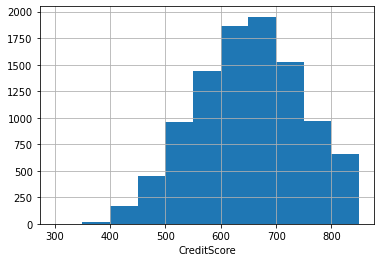

In [10]:
# Visualize the distribution of CreditScore using histogram
df.CreditScore.hist(bins=range(300, 900, 50))
plt.xlabel('CreditScore')

(array([  20.,  194.,  520., 1046., 1504., 1911., 1876., 1408.,  897.,
         624.]),
 array([-3.01568575, -2.50457819, -1.99347062, -1.48236306, -0.9712555 ,
        -0.46014794,  0.05095962,  0.56206718,  1.07317475,  1.58428231,
         2.09538987]),
 <BarContainer object of 10 artists>)

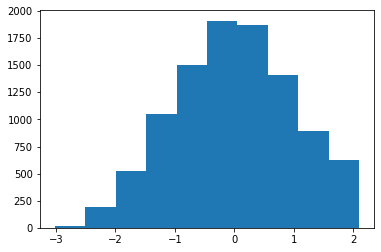

In [147]:
from sklearn.preprocessing import PowerTransformer

test_np = PowerTransformer(method='box-cox').fit_transform(df[['CreditScore']])
plt.hist(test_np)

#### Geography

<Axes: ylabel='Geography'>

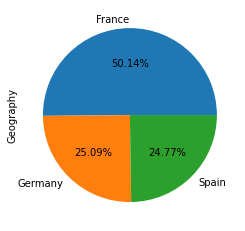

In [11]:
# Visualize the proportion of each Geography using pie chart
df.Geography.value_counts().plot.pie(autopct='%.2f%%')

#### Gender

<Axes: ylabel='Gender'>

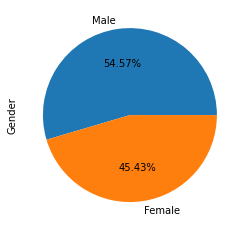

In [12]:
# Visualize the proportion of each Gender using pie chart
df.Gender.value_counts().plot.pie(autopct='%.2f%%')

#### Age

Text(0.5, 0, 'Age')

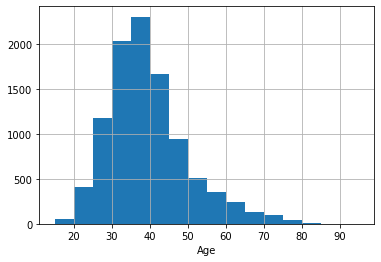

In [13]:
# Visualize the distribution of Age using histogram
df.Age.hist(bins=range(15, 100, 5))
plt.xlabel('Age')

Text(0.5, 0, 'Age')

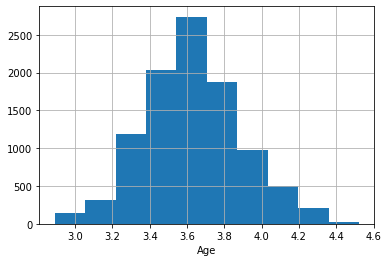

In [129]:
df.Age.apply(np.log).hist()
plt.xlabel('Age')

#### Tenure

<Axes: xlabel='Tenure'>

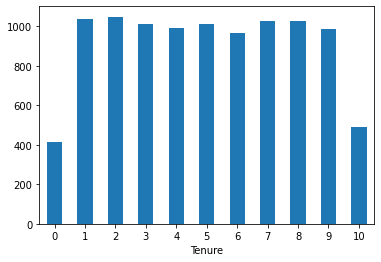

In [14]:
# Visualize the count of Tenure using barplot
df.Tenure.value_counts().sort_index().plot(kind='bar', rot=0, xlabel='Tenure')

#### Balance

Text(0.5, 0, 'Balance')

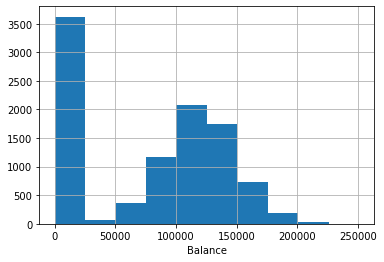

In [15]:
# Visualize the distribution of Balance using histogram
df.Balance.hist()
plt.xlabel('Balance')

Text(0.5, 0, 'Balance')

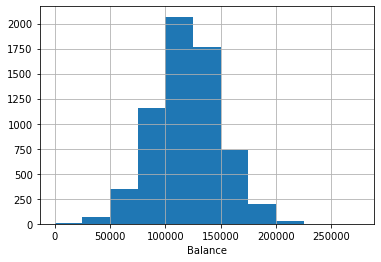

In [16]:
df[df.Balance > 0]['Balance'].hist(bins=range(0, 300000, 25000))
plt.xlabel('Balance')

In [135]:
print(df[df.Balance > 0]['Balance'].mean())
print(df[df.Balance > 0]['Balance'].median())

119827.49379288736
119839.69


#### NumOfProducts

<Axes: xlabel='NumOfProducts'>

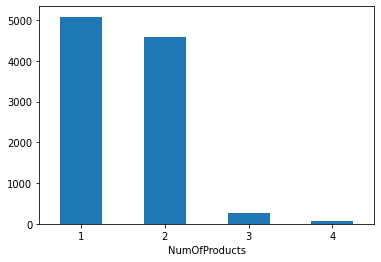

In [17]:
# Visualize the count of NumOfProducts using barplot
df.NumOfProducts.value_counts().sort_index().plot(kind='bar',
                                                  rot=0,
                                                  xlabel='NumOfProducts')



#### HasCrCard

<Axes: ylabel='HasCrCard'>

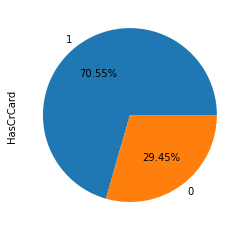

In [18]:
# Visualize the proportion of HasCrCard using pie chart
df.HasCrCard.value_counts().plot.pie(autopct='%.2f%%')

#### IsActiveMember

<Axes: ylabel='IsActiveMember'>

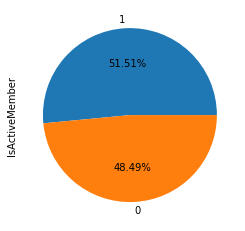

In [19]:
# Visualize the proportion of IsActiveMember using pie chart
df.IsActiveMember.value_counts().plot.pie(autopct='%.2f%%')

#### EstimatedSalary

Text(0.5, 0, 'EstimatedSalary')

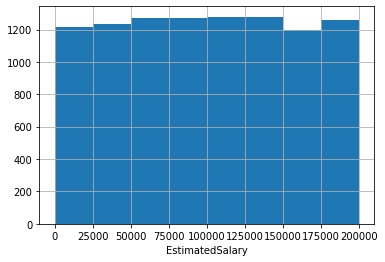

In [20]:
# Visualize the Distribution of the Estimated Salary
df.EstimatedSalary.hist(bins=range(0,225000,25000))
plt.xlabel('EstimatedSalary')

#### Exited

<Axes: ylabel='Exited'>

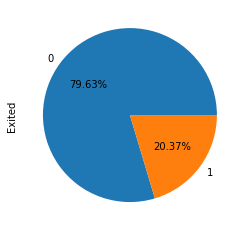

In [21]:
# Visualize the proportion of Exited using pie chart
df.Exited.value_counts().plot.pie(autopct='%.2f%%')

### Data Analysis
- Determine the influence of each features to the rate of customers withdrawing their account (Churn rate).
$$Churn\_rate = \frac{Number\_of\_churned\_customers}{Number\_of\_all\_customers}$$
- Explore and visualize the churn rate categorized by each categorical feature.

In [22]:
# Define function for calculating churn rate grouping by each feature
def churn_rate_by_group(dataframe, category):
    """
    Create the pivot table displaying churn rate for the dataframe grouped by
    specific categorical variable.

    Parameters
    ----------
    dataframe : pandas.DataFrame
        The input dataframe required for determining the churn rate.
    category : str
        The name of the column for grouping by.

    Returns
    -------
    category_pivot : pandas.DataFrame
        The pivot table showing churn rate for the dataframe
        grouped by each category.
    """
    churn_by_category = dataframe.groupby(category)\
                                        ['Exited'].value_counts(normalize=True)
    category_pivot = churn_by_category.unstack()
    category_pivot.fillna(0, inplace=True)
    churn_rate = pd.Series(category_pivot[1] * 100, name='churn_rate_pct')
    churn_rate.sort_values(ascending=False, inplace=True)
    
    return pd.DataFrame(churn_rate)

In [23]:
# Define function for visualizing the churn rate from the function above
def plot_churn_rate(pivot, kind='bar', rot=0, ax=None):
    """
    Generate the barplot for churn rate of each category.

    Parameters
    ----------
    pivot : pandas.DataFrame
        The pivot table showing churn rate for the dataframe
        grouped by each category.
    kind : string
        The kind of plot.
    rot : int
        The rotation angle of axis labels.
    ax : matplotlib axes object
        An axes of the current figure.
    """
    pivot['churn_rate_pct'].plot(kind=kind,
                                 rot=rot,
                                 ax=ax,
                                 ylabel='Churn Rate (%)',
                                 title=f'Churn Rate by {pivot.index.name}')

In [24]:
# Modify the dataframe for analysis
eda_df = df.copy()

# Create Age group category
eda_df['age_group'] = np.where(
    df['Age'] < 30, 'Under 30', np.where(
        df['Age'] < 40, 'Between 30 and 40', np.where(
            df['Age'] < 50, 'Between 40 and 50', np.where(
                df['Age'] < 60, 'Between 50 and 60', '60 and Above'))))

# Create Balance group category
eda_df['balance_group'] = np.where(
    df['Balance'] == 0, 'No Balance', np.where(
        df['Balance'] < 100000, 'Less than 100k', np.where(
            df['Balance'] < 150000, 'Between 100k and 150k', np.where(
                df['Balance'] < 200000, 'Between 150k and 200k', 'More than 200k'))))

        churn_rate_pct
Gender                
Female       25.071539
Male         16.455928 



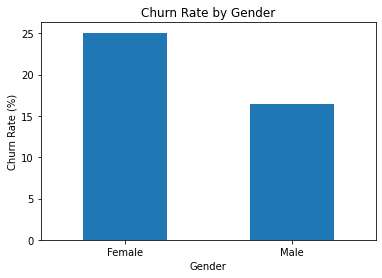

In [25]:
# Explore and visualize the churn rate by Gender
print(churn_rate_by_group(eda_df, 'Gender'),'\n')
plot_churn_rate(churn_rate_by_group(eda_df, 'Gender'))
plt.show()

                   churn_rate_pct
age_group                        
Under 30                 7.556368
Between 30 and 40       10.883571
Between 40 and 50       30.786860
Between 50 and 60       56.041427
60 and Above            27.946768 



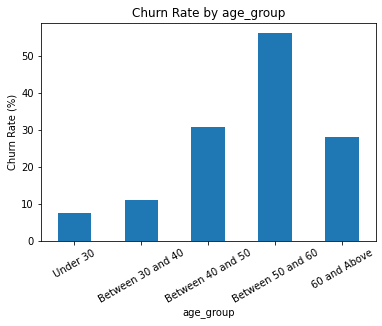

In [26]:
# Explore and visualize the churn rate by age_group
churn_rate_by_age = churn_rate_by_group(eda_df, 'age_group')\
                        .loc[['Under 30', 'Between 30 and 40',
                              'Between 40 and 50', 'Between 50 and 60',
                              '60 and Above']]
print(churn_rate_by_age, '\n')
plot_churn_rate(churn_rate_by_age, rot=30)
plt.show()

                       churn_rate_pct
balance_group                        
No Balance                  13.823611
Less than 100k              20.580808
Between 100k and 150k       25.770235
Between 150k and 200k       21.925134
More than 200k              55.882353 



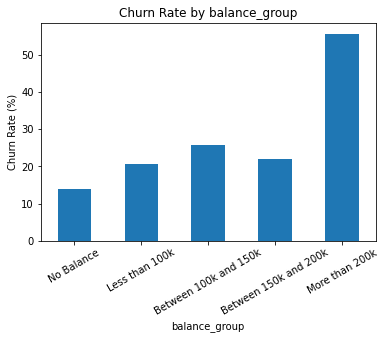

In [27]:
# Explore and visualize the churn rate by balance_group
churn_rate_by_balance = churn_rate_by_group(eda_df, 'balance_group')\
                        .loc[['No Balance', 'Less than 100k',
                              'Between 100k and 150k', 'Between 150k and 200k',
                              'More than 200k']]
print(churn_rate_by_balance, '\n')
plot_churn_rate(churn_rate_by_balance, rot=30)
plt.show()

           churn_rate_pct
Geography                
Germany         32.443204
Spain           16.673395
France          16.154767 



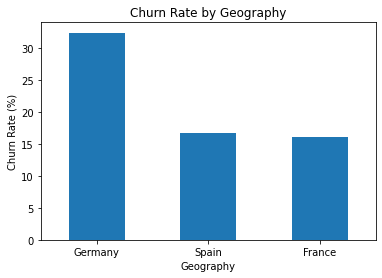

In [28]:
# Explore and visualize the churn rate by Geography
print(churn_rate_by_group(eda_df, 'Geography'), '\n')
plot_churn_rate(churn_rate_by_group(eda_df, 'Geography'))
plt.show()

                churn_rate_pct
IsActiveMember                
0                    26.850897
1                    14.269074 



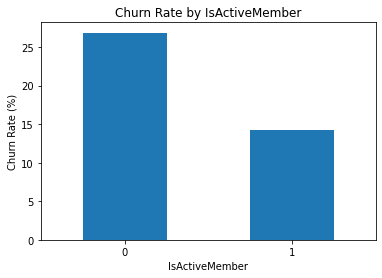

In [29]:
# Explore and visualize the churn rate by IsActiveMember
print(churn_rate_by_group(eda_df, 'IsActiveMember'), '\n')
plot_churn_rate(churn_rate_by_group(eda_df, 'IsActiveMember'))
plt.show()

**Insights**
- Female (25.07%) has higher churn rate than Male (16.46%).
- Customers in age group of Between 50 and 60 has very high risk of churning (56.04%).
- Customers with high Balance have high risk of churning. (55.88%)
- Among 3 countries, customers live in Germany has high chance of churning (32.44%).
- Non-active customers are more likely to churn than active customers (26.85%).


##  Data Preprocessing

### Feature Selection

In [30]:
# Drop the irrelevant features
model_df = df.drop(['CustomerId', 'Surname'], axis=1)
model_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [33]:
# Extract the features and target to X, y arrays
X = model_df.drop('Exited', axis=1)
y = model_df.Exited

<Axes: ylabel='Exited'>

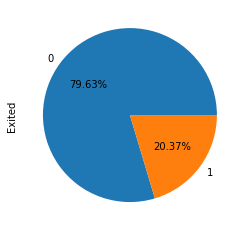

In [34]:
# Check the imbalance of the data
y.value_counts().plot.pie(autopct='%.2f%%')

- According to the above chart, the proportion of each class is not balanced.
- In order to prevent misclassification error, the dataset need to be balanced by using oversampling techniques.

### Preprocessing Pipeline

In [364]:
model_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [197]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,\
                                  FunctionTransformer

# Create the pipeline for preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('box-cox', Pipeline([('box-cox', PowerTransformer(method='box-cox'))]), [0]),
    ('log', Pipeline([('log', FunctionTransformer(np.log))]), [3]),
    ('numeric', Pipeline([('standardizer', StandardScaler())]), [5, 9]),
    ('categorical', OneHotEncoder(drop='first'), [1, 2, 7, 8])
    ], remainder='passthrough')

In [219]:
# Perform data preprocessing on dataset
X_norm = preprocessor.fit_transform(X)

In [235]:
from sklearn.model_selection import learning_curve

# Create the learning curve for different number of training examples
model_test = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=42)
train_sizes, train_scores, test_scores = learning_curve(model_test,
                                                        X_norm, y,
                                                        train_sizes=np.linspace(0.001, 1, 50),
                                                        scoring='f1')

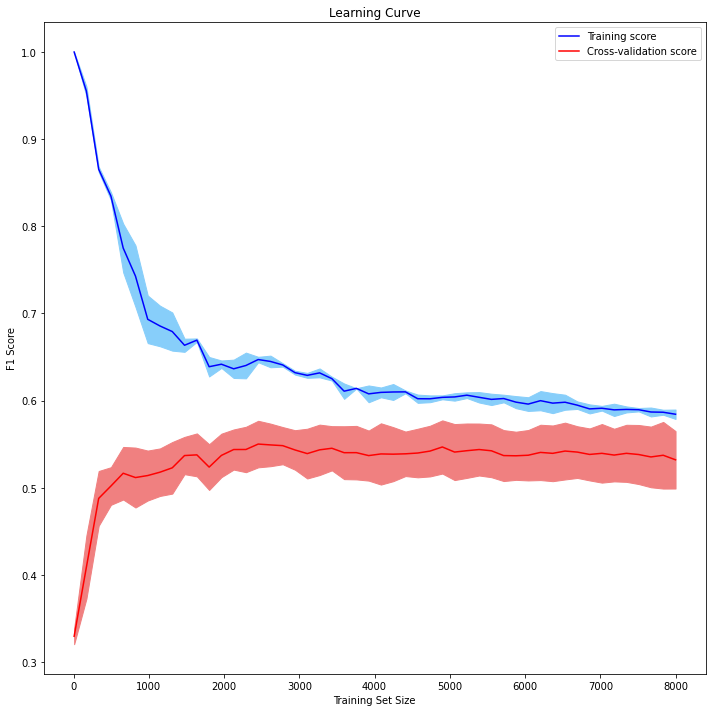

In [362]:
# Plot the learning curve
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, color='b',  label="Training score")
plt.plot(train_sizes, test_mean, color='r', label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="lightskyblue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='lightcoral')

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("F1 Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### Spliting Data
- This dataset is splited into training set, validation set, and test set.
    - Training set is used for fitting the model.
    - Validation set is used for evaluating the performance of the model, comparing with other models.
    - Test set is used for ensuring that the model is practical with unseen data.
- Dataset is splitted with 60:20:20 ratio.

In [196]:
from sklearn.model_selection import train_test_split

# Split the dataset to training, validation, and test set with 60:20:20 ratio
X_temp, X_test, y_temp, y_test = train_test_split(X, y, stratify=y,
                                                  test_size=0.2,
                                                  random_state=84)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, 
                                                  stratify=y_temp,
                                                  test_size=0.25,
                                                  random_state=84)

print(f'The shape of X_train: {X_train.shape}')
print(f'The shape of X_val: {X_val.shape}')
print(f'The shape of X_test: {X_test.shape}')
print(f'The shape of y_train: {y_train.shape}')
print(f'The shape of y_val: {y_val.shape}')
print(f'The shape of y_test: {y_test.shape}')

The shape of X_train: (6000, 10)
The shape of X_val: (2000, 10)
The shape of X_test: (2000, 10)
The shape of y_train: (6000,)
The shape of y_val: (2000,)
The shape of y_test: (2000,)


In [198]:
# Perform data preprocessing
X_train_norm = preprocessor.fit_transform(X_train)
X_val_norm = preprocessor.transform(X_val)
X_test_norm = preprocessor.transform(X_test)

### Oversampling

In [199]:
from imblearn.over_sampling import SMOTE

# Use SMOTE for oversample the minor class
X_train_norm, y_train = SMOTE(sampling_strategy='minority', random_state=84).fit_resample(X_train_norm, y_train)

<Axes: ylabel='Exited'>

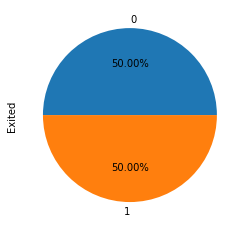

In [200]:
# Recheck the proportion of each class
y_train.value_counts().plot.pie(autopct='%.2f%%')

## Model Development and Evaluation
- Model
    - Random Forest
- Evaluation metrics 
    - Since this project is focusing on finding the customer who has high chance of churning (Class 1), we need the model which has very high rate of accuracy among **ACTUAL** customers in the churning class (Class 1).
    - We also need the model which has low rate of **MISPREDICTION**, especially for churning class, since we want to avoid the unnecessary cost used for performing the retention campaign for wrong customers.
    - Therefore, **F1 score** is used for performance comparison among these models.

### Hyperparameter Tuning

In [314]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Perform GridSearchCV for hyperparameter tuning
model = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200, 500],
              'max_depth': range(4, 11)}

model_cv = GridSearchCV(model, param_grid=param_grid, scoring='f1')
model_cv.fit(X_train_norm, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(4, 11),
                         'n_estimators': [100, 200, 500]},
             scoring='f1')

In [315]:
clf = model_cv.best_estimator_
y_pred_train = clf.predict(X_train_norm)
y_pred_val = clf.predict(X_val_norm)

print(f'{f1_score(y_train, y_pred_train)*100:.2f} % F1 score on the training set.')
print(f'{f1_score(y_val, y_pred_val)*100:.2f} % F1 score on the validation set.')

91.57 % F1 score on the training set.
60.88 % F1 score on the validation set.


In [316]:
clf

RandomForestClassifier(max_depth=10)

<Axes: >

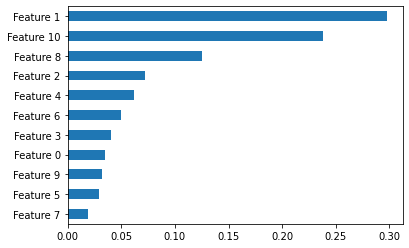

In [317]:
# Visualize the feature importance from the model
pd.Series(clf.feature_importances_,
          index=[f'Feature {ind}' 
                 for ind in range(X_train_norm.shape[1])])\
                 .sort_values().plot(kind='barh')

### Feature Selection
- Try selecting only relevant features

In [320]:
model = RandomForestClassifier()

# Select only features which has more than 0.05 gini importance
features = [1, 2, 4, 6, 8, 10]

# Perform GridSearchCV for hyperparameter tuning
model_cv6 = GridSearchCV(model, param_grid=param_grid, scoring='f1')
model_cv6.fit(X_train_norm[:, features], y_train)

clf6 = model_cv6.best_estimator_
y_pred_train = clf6.predict(X_train_norm[:, features])
y_pred_val = clf6.predict(X_val_norm[:, features])

print(f'{f1_score(y_train, y_pred_train)*100:.2f} % F1 score on the training set.')
print(f'{f1_score(y_val, y_pred_val)*100:.2f} % F1 score on the validation set.')

88.76 % F1 score on the training set.
61.98 % F1 score on the validation set.


In [366]:
clf6

RandomForestClassifier(max_depth=10, n_estimators=500)

### Dimensionality Reduction
- Try Reducing the dimensionality of the data

In [325]:
from sklearn.decomposition import PCA

pipeline = Pipeline([
    ('pca', PCA(n_components=6)),
    ('classifier', RandomForestClassifier(max_depth=10, n_estimators=500))
])

pipeline.fit(X_train_norm, y_train)
y_pred_train = pipeline.predict(X_train_norm)
y_pred_val = pipeline.predict(X_val_norm)

print(f'{f1_score(y_train, y_pred_train)*100:.2f} % F1 score on the training set.')
print(f'{f1_score(y_val, y_pred_val)*100:.2f} % F1 score on the validation set.')

85.82 % F1 score on the training set.
51.40 % F1 score on the validation set.


**Model Selection Result**
- According to the model selection process, the Random Forest Model with reducing the number of relevant features is the suitable model with approximately 62% F1 score on the validation set.

### Test the model
- Test the performance of the model using test set.

In [327]:
y_pred_test = clf6.predict(X_test_norm[:, features])
print(f'{f1_score(y_test, y_pred_test)*100:.2f} % F1 score on the test set.\n')

61.96 % F1 score on the test set.



[Text(0, 0.5, 'churn'), Text(0, 1.5, 'not churn')]

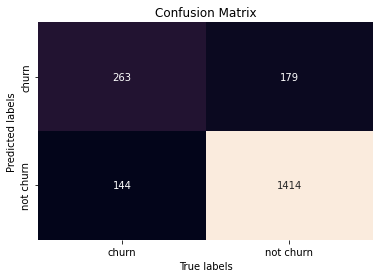

In [328]:
from sklearn.metrics import confusion_matrix, classification_report

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_test, labels=[1, 0]).transpose()

ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='.0f', cbar=False, ax=ax)
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['churn', 'not churn'])
ax.yaxis.set_ticklabels(['churn', 'not churn'])

In [329]:
# Print out the report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1593
           1       0.60      0.65      0.62       407

    accuracy                           0.84      2000
   macro avg       0.75      0.77      0.76      2000
weighted avg       0.84      0.84      0.84      2000



<Axes: >

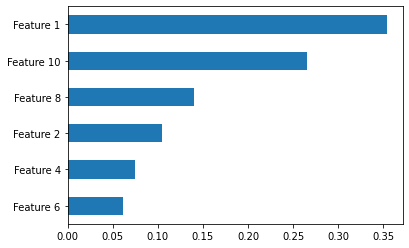

In [331]:
# Visualize the feature importance from the model
pd.Series(clf6.feature_importances_,
          index=[f'Feature {ind}' 
                 for ind in features])\
                 .sort_values().plot(kind='barh')

According to the bar chart above, the best predictors for the churn prediction are respectively **Age**, **NumOfProducts**, and **IsActiveMember**.

## Model Deployment

### Create Pipeline
- Create pipeline for preprocessing and predicting the data.

In [357]:
# Select only 6 relevant features
selector = ColumnTransformer(transformers=[
    ('select', 'passthrough', [1, 2, 4, 6, 8, 10])
], remainder='drop')
selector.fit(X_train_norm)

ColumnTransformer(transformers=[('select', 'passthrough', [1, 2, 4, 6, 8, 10])])

In [358]:
import joblib

# Create model pipeline including the standardize process and the prediction
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('column_selection', selector),
    ('model', clf6)
])

# Save the pipeline in .joblib format
joblib.dump(model_pipeline, 'churn_model.joblib')

['churn_model.joblib']

### Prediction function
- Create function for churn prediction.

In [351]:
model_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [352]:
# Define function for making predictions for new data
def churn_prediction(csv_filename, model, option='label'):
    """
    Perform churn predictions on new data.

    Parameters
    ----------
    csv_filename : string
        File path of the csv file for new data.
    model : model object
        Model used to make predictions.
    option : string
        Specify the option of the result (label or probability).
    """
    # Column for checking if some columns is missing
    check_col = {'Age', 'Balance', 'CreditScore', 'CustomerId',
                 'EstimatedSalary', 'Gender', 'Geography', 'HasCrCard',
                 'IsActiveMember', 'NumOfProducts', 'Surname', 'Tenure'}
             
    try:
        assert option in {'label', 'probability'}
        df = pd.read_csv(csv_filename, index_col='RowNumber')
        if (set(df.columns) != check_col) or (df.isna().sum().sum() > 0):
            raise ValueError

    except AssertionError:
        print('An argument "option" should be either "label" or "probability".')
    
    except ValueError:
        print('''Please check that the index of the file is named as "RowNumber"
        or
        Please check if there is some missing fields.''')
    
    else:
        # Import the csv file
        df = pd.read_csv(csv_filename, index_col='RowNumber')

        # Adjust the dataframe to dummies format
        input_df = df.drop(['CustomerId', 'Surname'], axis=1)

        # Output as label
        if option == 'label':

            result = model.predict(input_df)
            for ind, cust in df.iterrows():
                if result[ind-1]:
                    print(f'{cust["Surname"]} is at HIGH RISK OF CHURNING.')
                else:
                    print(f'{cust["Surname"]} is not likely to churn.')
        
        # Output as probability
        elif option == 'probability':

            result = model.predict_proba(input_df)
            for ind, cust in df.iterrows():
                print(f'''There is {result[ind-1, 1]*100:.0f}% probability that {cust["Surname"]} will churn.''')

        return result

### Test the prediction function
- Test the prediction function with the new dataset.

In [347]:
# Example of new dataset
new_df = pd.DataFrame(
    {"RowNumber": [1, 2, 3, 4, 5],
     "CustomerId": [15847329, 15976342, 15997631, 16142412, 16793421],
     "Surname": ["Pence", "Johnson", "Winter", "Boston", "Richard"],
     "CreditScore": [580, 380, 850, 600, 450],
     "Geography": ["France", "France", "Germany", "Spain", "Germany"],
     "Gender": ["Male", "Male", "Female", "Female", "Male"],
     "Age": [24, 45, 39, 58, 31],
     "Tenure": [3, 6, 4, 4, 5],
     "Balance": [75000, 102500, 90000, 160000, 195000],
     "NumOfProducts": [1, 3, 2, 2, 1],
     "HasCrCard": [0, 1, 1, 0, 1],
     "IsActiveMember": [1, 0, 1, 0, 1],
     "EstimatedSalary": [120000, 180000, 150000, 142000, 85000]}
)

new_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15847329,Pence,580,France,Male,24,3,75000,1,0,1,120000
1,2,15976342,Johnson,380,France,Male,45,6,102500,3,1,0,180000
2,3,15997631,Winter,850,Germany,Female,39,4,90000,2,1,1,150000
3,4,16142412,Boston,600,Spain,Female,58,4,160000,2,0,0,142000
4,5,16793421,Richard,450,Germany,Male,31,5,195000,1,1,1,85000


In [336]:
# Save to .csv file
new_df.to_csv('churn_test.csv', index=False)

In [361]:
# Import model
model = joblib.load('churn_model.joblib')
# Make a prediction of new dataset
_ = churn_prediction('churn_test.csv', model, option='label')

Pence is not likely to churn.
Johnson is at HIGH RISK OF CHURNING.
Winter is not likely to churn.
Boston is at HIGH RISK OF CHURNING.
Richard is not likely to churn.


In [367]:
# Using 'probability' option
_ = churn_prediction('churn_test.csv', model, option='probability')

There is 6% probability that Pence will churn.
There is 96% probability that Johnson will churn.
There is 17% probability that Winter will churn.
There is 92% probability that Boston will churn.
There is 19% probability that Richard will churn.


According to the analysis before, we can see that both Johnson and Boston come from people with age group of 40-60 years which has high rate of churning. Furthermore, their accounts are no longer active which make both of them are at **HIGH RISK OF CHURNING**.